In [55]:
!rm -rf pose

In [56]:
!unzip /content/hyungjun_pose.zip

Archive:  /content/hyungjun_pose.zip
   creating: pose/test/
   creating: pose/test/drowsy/
  inflating: pose/test/drowsy/joe_image2329.jpg  
  inflating: pose/test/drowsy/joe_image2330.jpg  
  inflating: pose/test/drowsy/joe_image2331.jpg  
  inflating: pose/test/drowsy/joe_image2332.jpg  
  inflating: pose/test/drowsy/joe_image2333.jpg  
  inflating: pose/test/drowsy/joe_image2334.jpg  
  inflating: pose/test/drowsy/joe_image2335.jpg  
  inflating: pose/test/drowsy/joe_image2336.jpg  
  inflating: pose/test/drowsy/joe_image2337.jpg  
  inflating: pose/test/drowsy/joe_image2338.jpg  
  inflating: pose/test/drowsy/joe_image2339.jpg  
  inflating: pose/test/drowsy/joe_image2340.jpg  
  inflating: pose/test/drowsy/joe_image2341.jpg  
   creating: pose/test/notdrowsy/
  inflating: pose/test/notdrowsy/joe_image2319.jpg  
  inflating: pose/test/notdrowsy/joe_image2320.jpg  
  inflating: pose/test/notdrowsy/joe_image2321.jpg  
  inflating: pose/test/notdrowsy/joe_image2322.jpg  
  inflating:

In [57]:
!tar -xvf /content/youngjun_pose.tar.gz
!tar -xvf /content/woohyun_pose.tar.gz
!tar -xvf /content/kyuwon_pose.tar.gz

pose/
pose/train/
pose/train/drowsy/
pose/train/drowsy/leey_image202.jpg
pose/train/drowsy/leey_image300.jpg
pose/train/drowsy/leey_image234.jpg
pose/train/drowsy/leey_image213.jpg
pose/train/drowsy/leey_image168.jpg
pose/train/drowsy/leey_image219.jpg
pose/train/drowsy/leey_image291.jpg
pose/train/drowsy/leey_image277.jpg
pose/train/drowsy/leey_image171.jpg
pose/train/drowsy/leey_image178.jpg
pose/train/drowsy/leey_image218.jpg
pose/train/drowsy/leey_image306.jpg
pose/train/drowsy/leey_image191.jpg
pose/train/drowsy/leey_image208.jpg
pose/train/drowsy/leey_image163.jpg
pose/train/drowsy/leey_image223.jpg
pose/train/drowsy/leey_image283.jpg
pose/train/drowsy/leey_image181.jpg
pose/train/drowsy/leey_image297.jpg
pose/train/drowsy/leey_image260.jpg
pose/train/drowsy/leey_image270.jpg
pose/train/drowsy/leey_image198.jpg
pose/train/drowsy/leey_image232.jpg
pose/train/drowsy/leey_image299.jpg
pose/train/drowsy/leey_image303.jpg
pose/train/drowsy/leey_image309.jpg
pose/train/drowsy/leey_imag

In [61]:
!rm -rf pose/test/notdrowsy/.ipynb_checkpoints
!rm -rf pose/train/notdrowsy/.ipynb_checkpoints
!rm -rf pose/train/drowsy/.ipynb_checkpoints

In [62]:
!tar cvfz pose.tar.gz pose

pose/
pose/test/
pose/test/notdrowsy/
pose/test/notdrowsy/leey_image151.jpg
pose/test/notdrowsy/kyuwon_image364.jpg
pose/test/notdrowsy/joe_image2327.jpg
pose/test/notdrowsy/leewh_image324.jpg
pose/test/notdrowsy/joe_image2321.jpg
pose/test/notdrowsy/leey_image154.jpg
pose/test/notdrowsy/leey_image153.jpg
pose/test/notdrowsy/joe_image2326.jpg
pose/test/notdrowsy/leewh_image321.jpg
pose/test/notdrowsy/kyuwon_image361.jpg
pose/test/notdrowsy/leey_image160.jpg
pose/test/notdrowsy/joe_image2328.jpg
pose/test/notdrowsy/kyuwon_image369.jpg
pose/test/notdrowsy/joe_image2322.jpg
pose/test/notdrowsy/leey_image155.jpg
pose/test/notdrowsy/kyuwon_image368.jpg
pose/test/notdrowsy/leey_image159.jpg
pose/test/notdrowsy/leewh_image320.jpg
pose/test/notdrowsy/joe_image2320.jpg
pose/test/notdrowsy/kyuwon_image370.jpg
pose/test/notdrowsy/kyuwon_image363.jpg
pose/test/notdrowsy/leewh_image323.jpg
pose/test/notdrowsy/kyuwon_image362.jpg
pose/test/notdrowsy/leey_image157.jpg
pose/test/notdrowsy/kyuwon_image

In [64]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [66]:
PATH_TRAIN_NOTDROWSY_LIST = os.listdir("pose/train/notdrowsy/")
PATH_TRAIN_DROWSY_LIST  = os.listdir("pose/train/drowsy/")

In [67]:
import mediapipe as mp
import numpy as np
import math

In [68]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [69]:
landmark_names = [
        'nose',
        'left_eye_inner',
        'left_eye',
        'left_eye_outer',
        'right_eye_inner',
        'right_eye',
        'right_eye_outer',
        'left_ear',
        'right_ear',
        'mouth_left',
        'mouth_right',
        'left_shoulder',
        'right_shoulder',
        'left_elbow',
        'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]

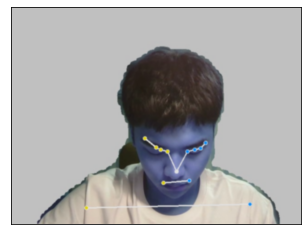

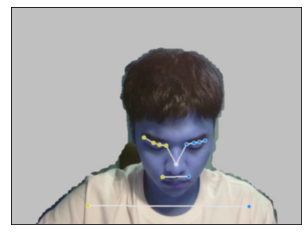

In [70]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# 이미지 파일 경로
IMAGE_FILES = ["pose/test/drowsy/leewh_image305.jpg", "pose/test/drowsy/leewh_image306.jpg"]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue

    
    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    
    #mp_drawing.plot_landmarks(
     #   results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    
    cv2.imwrite("test.jpg",annotated_image)
    check = cv2.imread("test.jpg")
    plt.imshow(check, interpolation='bicubic')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [71]:
def Shoulder_Point(result, image_width, image_height) :
    L_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
    R_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
    
    
    R_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height
    L_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height
    
    return R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y

In [72]:
def Compute_Neck(result, image_width, image_height) :
    L_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
    R_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
    Neck_X = (L_Shoulder_X + R_Shoulder_X) / float(2.0)
    
    R_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height
    L_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height
    Neck_Y = (L_Shoulder_Y + R_Shoulder_Y) / float(2.0)

    return Neck_X, Neck_Y

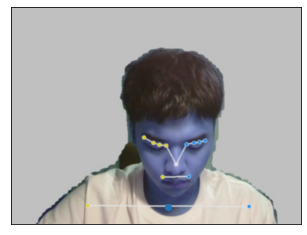

In [73]:
check = cv2.imread("test.jpg")
plt.imshow(check, interpolation='bicubic')
plt.xticks([])
plt.yticks([])
x,y = Compute_Neck(results, image_width, image_height)
plt.scatter(x,y)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
def Nose_Point(result, image_width, image_height) :
    Nose_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
    Nose_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height

    return Nose_X, Nose_Y

In [75]:
def Point_by_MediaPipe(image_path, train_test, label):
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_pose = mp.solutions.pose
    if train_test == "train":
        train_test = "train/"
    else:
        train_test = "test/"
    
    if label == "drowsy":
        label = "drowsy/"
    else:
        label = "notdrowsy/"
        
# For static images:
    IMAGE_FILES = image_path
    results = []
    BG_COLOR = (192, 192, 192) # gray
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=True,
        min_detection_confidence=0.5) as pose:
        for idx, file in enumerate(IMAGE_FILES):
            file = "pose/" + train_test + label + file
            print(file)
            image = cv2.imread(file)
            image_height, image_width, _ = image.shape
            results.append(pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

            if not results[idx].pose_landmarks:
                continue
                
            if idx % 10 == 0:
                print("전체 이미지 : %d / 완료한 이미지 %d" % (len(IMAGE_FILES), idx))
    print("---완료---")
    return results, image_height, image_width

In [76]:
drowsy_results, image_height, image_width = Point_by_MediaPipe(PATH_TRAIN_DROWSY_LIST, "train", "drowsy")
notdrowsy_results, image_height, image_width = Point_by_MediaPipe(PATH_TRAIN_NOTDROWSY_LIST, "train", "notdrowsy")

pose/train/drowsy/leewh_image172.jpg
전체 이미지 : 600 / 완료한 이미지 0
pose/train/drowsy/leewh_image154.jpg
pose/train/drowsy/joe_image2318.jpg
pose/train/drowsy/kyuwon_image265.jpg
pose/train/drowsy/leewh_image256.jpg
pose/train/drowsy/joe_image2176.jpg
pose/train/drowsy/kyuwon_image246.jpg
pose/train/drowsy/joe_image2272.jpg
pose/train/drowsy/leewh_image217.jpg
pose/train/drowsy/leewh_image250.jpg
pose/train/drowsy/kyuwon_image295.jpg
전체 이미지 : 600 / 완료한 이미지 10
pose/train/drowsy/kyuwon_image342.jpg
pose/train/drowsy/kyuwon_image207.jpg
pose/train/drowsy/joe_image2177.jpg
pose/train/drowsy/leewh_image275.jpg
pose/train/drowsy/leewh_image179.jpg
pose/train/drowsy/joe_image2212.jpg
pose/train/drowsy/leewh_image156.jpg
pose/train/drowsy/kyuwon_image224.jpg
pose/train/drowsy/leey_image181.jpg
pose/train/drowsy/leewh_image224.jpg
전체 이미지 : 600 / 완료한 이미지 20
pose/train/drowsy/leewh_image211.jpg
pose/train/drowsy/leewh_image289.jpg
pose/train/drowsy/kyuwon_image349.jpg
pose/train/drowsy/leewh_image244.j

In [77]:
len(drowsy_results)

600

In [78]:
len(notdrowsy_results)

646

In [85]:
def Point_DataFrame(results, label):
    point_list = []
    if label == 0 or label == "notdrowsy":
        label = 0
    elif label == 1 or label == "drowsy":
        label = 1
    else:
        label = -1
    for result in results:
        temp = []
        Neck_X, Neck_Y = Compute_Neck(result, image_width, image_height)
        Nose_X, Nose_Y = Nose_Point(result, image_width, image_height)
        R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y = Shoulder_Point(result, image_width, image_height)
        temp.append(Neck_X)
        temp.append(Neck_Y)
        temp.append(Nose_X)
        temp.append(Nose_Y)
        temp.append(R_Shoulder_X)
        temp.append(R_Shoulder_Y)
        temp.append(L_Shoulder_X)
        temp.append(L_Shoulder_Y)
        temp.append(label)
        point_list.append(temp)
    dataframe = pd.DataFrame(columns = ["Neck_X", "Neck_Y", "Nose_X", "Nose_Y", "R_Shoulder_X", "R_Shoulder_Y","L_Shoulder_X", "L_Shoulder_Y", "label"],
                 data = point_list)
    return dataframe

In [87]:
train_data_drowsy = Point_DataFrame(drowsy_results, "drowsy")
train_data_notdrowsy = Point_DataFrame(notdrowsy_results, "notdrowsy")

AttributeError: ignored

In [ ]:
train_data_drowsy

In [ ]:
train_data_notdrowsy

In [ ]:
train_data_drowsy.info()

In [ ]:
train_data_notdrowsy.info()

In [ ]:
def Compute_Diff(dataframe):
    dataframe["Diff_X"] = dataframe["Neck_X"] - dataframe["Nose_X"]
    dataframe["Diff_Y"] = dataframe["Neck_Y"] - dataframe["Nose_Y"]
    return dataframe

In [ ]:
train_data_drowsy = Compute_Diff(train_data_drowsy)
train_data_notdrowsy = Compute_Diff(train_data_notdrowsy)

In [ ]:
train_data_drowsy.info()

In [ ]:
train_data_notdrowsy.info()

In [ ]:
train_data_notdrowsy[['Neck_X','Nose_X', "Diff_X"]]

In [ ]:
def Comput_Degree(dataframe):
    AB = np.sqrt((dataframe["Nose_X"] - dataframe["Neck_X"]) ** 2 
              + (dataframe["Nose_Y"] - dataframe["Neck_Y"]) ** 2)
    AC = np.abs(dataframe["Nose_X"] - dataframe["Neck_X"])
    cos = AC / AB
    degree = np.degrees(cos)
    dataframe.insert(0, "degree", degree, True)
    return dataframe

In [ ]:
train_data_drowsy = Comput_Degree(train_data_drowsy)
train_data_notdrowsy = Comput_Degree(train_data_notdrowsy)

In [ ]:
train_data_drowsy.info()

In [ ]:
train_data_notdrowsy.info()

In [ ]:
train_data_drowsy = train_data_drowsy.drop(train_data_drowsy.columns[[1,2,3,4,5,6,7,8]], axis = 1)
train_data_notdrowsy = train_data_notdrowsy.drop(train_data_notdrowsy.columns[[1,2,3,4,5,6,7,8]], axis = 1)

In [ ]:
train_data_drowsy = train_data_drowsy[['degree', 'Diff_X', 'Diff_Y', 'label']]
train_data_notdrowsy = train_data_notdrowsy[['degree', 'Diff_X', 'Diff_Y', 'label']]

In [ ]:
train_data_drowsy

In [ ]:
train_data_notdrowsy

In [ ]:
DataSet = pd.concat([train_data_drowsy, train_data_notdrowsy], ignore_index= True)

In [ ]:
DataSet

In [ ]:
DataSet.to_csv("data/train_data.csv", index = False)

In [ ]:
test = pd.read_csv("data/train_data.csv")

In [ ]:
test